In [1]:
from rt_utils import RTStructBuilder
import matplotlib.pyplot as plt
import numpy as np
import pydicom
import os

In [2]:
path  = "//zkh/appdata/RTDicom/Projectline - Modelling lung cancer outcomes [panama code]/DICOM_data/DATA_VOLLEDIG_unstructured/0010539/X6 THORAX"
ctfile = "/MM Thorax2,5mm/"
rtfile ="/PinnPlan = A1Long (Wed May 13 123149 2015) RTSTRUCT/2.16.840.1.113669.2.931128.289629209.20150513125112.505113.DCM"

In [7]:
rtstruct = RTStructBuilder.create_from(
  dicom_series_path=path+ctfile,
  rt_struct_path=path+rtfile
)

# View all of the ROI names from within the image
print(rtstruct.get_roi_names())

# Loading the 3D Mask from within the RT Struct
mask_3d = rtstruct.get_roi_mask_by_name("GTVtumor")

rtstruct.add_roi(
    mask=mask_3d, 
    color=[255, 0, 255],
    name="GTVtumor_UIDok",
    name.ReferencedFrameOfReferenceUID = "1.2.840.113619.2.278.3.663816714.255.1430916283.320.13235.1"
    
)

rtstruct.add_roi(mask=mask_3d)



SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (335207160.py, line 16)

In [4]:
#PRINT CT UID
ct_dicom_dataset = pydicom.dcmread(os.path.join(path+ctfile,"IM11.DCM"))
series_instance_uid = ct_dicom_dataset.SeriesInstanceUID
print("Avg Series",series_instance_uid)

for element in ct_dicom_dataset.iterall():
    print(f"{element.tag} {element.name}: {element.value}")

Avg Series 1.2.840.113619.2.278.3.663816714.255.1430916283.323
(0008, 0008) Image Type: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0012) Instance Creation Date: 20150507
(0008, 0013) Instance Creation Time: 120426
(0008, 0016) SOP Class UID: 1.2.840.10008.5.1.4.1.1.2
(0008, 0018) SOP Instance UID: 1.2.840.113619.2.278.3.663816714.255.1430916283.324.11
(0008, 0020) Study Date: 20150507
(0008, 0021) Series Date: 20150507
(0008, 0022) Acquisition Date: 20150507
(0008, 0023) Content Date: 20150507
(0008, 0030) Study Time: 120113
(0008, 0031) Series Time: 120340
(0008, 0032) Acquisition Time: 120421.521103
(0008, 0033) Content Time: 120426
(0008, 0050) Accession Number: 5710829.1
(0008, 0060) Modality: CT
(0008, 0061) Modalities in Study: ['RTSTRUCT', 'RTPLAN', 'RTDOSE', 'OT', 'CT']
(0008, 0070) Manufacturer: GE MEDICAL SYSTEMS
(0008, 0080) Institution Name: UMCG Radiotherapie
(0008, 0090) Referring Physician's Name: RADIOTHERAPIE ALGEMEEN POLI
(0008, 1010) Station Name: CT3_EMM
(0008, 1030) S

In [103]:
#PRINT ONLY HEADER REGARDING REQUESTED TAG 
rtstruct_dataset = pydicom.dcmread(path+rtfile)
roi_name_to_find = 'CTV60'

roi_sequence = rtstruct_dataset.StructureSetROISequence
for roi_item in roi_sequence:
    roi_number = roi_item.ROINumber
    roi_name = roi_item.ROIName
    if roi_name == roi_name_to_find:
        # Print information for the found ROI
        print(f"ROI Name: {roi_name}")
        print(f"ROI Number: {roi_number}")
        referenced_frame_of_reference_uid = roi_item.ReferencedFrameOfReferenceUID
        print(f"Referenced Frame of Reference UID: {referenced_frame_of_reference_uid}")
        break

else:
    print(f"ROI with name '{roi_name_to_find}' not found in the dataset.")


ROI Name: CTV60
ROI Number: 18
Referenced Frame of Reference UID: 1.2.840.113619.2.278.3.663816714.255.1430916283.320.13235.1


In [120]:
target_series_instance_uid = series_instance_uid
for seq_item in rtstruct_dataset.ReferencedFrameOfReferenceSequence:
    for rt_series_item in seq_item.RTReferencedStudySequence:
        for rt_ref_series_item in rt_series_item.RTReferencedSeriesSequence:
            series_instance_uid = rt_ref_series_item.SeriesInstanceUID
            if series_instance_uid == target_series_instance_uid:
                print(f"Target Series Instance UID found: {target_series_instance_uid}")
                break

        if 'series_instance_uid' in locals() and series_instance_uid == target_series_instance_uid:
            break

    if 'series_instance_uid' in locals() and series_instance_uid == target_series_instance_uid:
        break
else:
    print(f"Target Series Instance UID '{target_series_instance_uid}' not found in the RTSTRUCT dataset.")

Target Series Instance UID found: 1.2.840.113619.2.278.3.663816714.255.1430916283.323


In [117]:
#PRINT FULL HEADER
rtstruct_dataset = pydicom.dcmread(path+rtfile)

for element in rtstruct_dataset.iterall():
    print(f"{element.tag}: {element.value}")

(0008, 0012): 20150513
(0008, 0013): 125126
(0008, 0016): 1.2.840.10008.5.1.4.1.1.481.3
(0008, 0018): 2.16.840.1.113669.2.931128.289629209.20150513125112.505113
(0008, 0020): 20150507
(0008, 0030): 120113
(0008, 0050): 5710829.1
(0008, 0060): RTSTRUCT
(0008, 0061): ['RTSTRUCT', 'RTPLAN', 'RTDOSE', 'OT', 'CT']
(0008, 0070): ADAC
(0008, 0090): RADIOTHERAPIE ALGEMEEN POLI
(0008, 1010): pinncm1
(0008, 1030): LUCHTW CT.TH
(0008, 103e): PinnPlan = A1Long (Wed May 13 12:31:49 2015) RTSTRUCT
(0008, 1090): Pinnacle3
(0008, 1110): [(0008, 1150) Referenced SOP Class UID            UI: Study Component Management SOP Class
(0008, 1155) Referenced SOP Instance UID         UI: 1.2.840.113619.2.278.3.663816714.255.1430916283.319]
(0008, 1150): 1.2.840.10008.3.1.2.3.2
(0008, 1155): 1.2.840.113619.2.278.3.663816714.255.1430916283.319
(0010, 0010): SCHENKEL^GERRIT
(0010, 0020): 0010539
(0010, 0021): UMCG
(0010, 0030): 19340807
(0010, 0040): M
(0010, 1002): [(0010, 0020) Patient ID                        

(3006, 0039): [(3006, 002a) ROI Display Color                   IS: [255, 0, 0]
(3006, 0040)  Contour Sequence  1 item(s) ---- 
   (3006, 0016)  Contour Image Sequence  1 item(s) ---- 
      (0008, 1150) Referenced SOP Class UID            UI: CT Image Storage
      (0008, 1155) Referenced SOP Instance UID         UI: 1.2.840.113619.2.278.3.663816714.255.1430916283.324.55
      ---------
   (3006, 0042) Contour Geometric Type              CS: 'POINT'
   (3006, 0046) Number of Contour Points            IS: '1'
   (3006, 0050) Contour Data                        DS: [1.78922, 21.3233, 0]
   ---------
(3006, 0084) Referenced ROI Number               IS: '1'(3006, 002a) ROI Display Color                   IS: [0, 255, 0]
(3006, 0040)  Contour Sequence  1 item(s) ---- 
   (3006, 0016)  Contour Image Sequence  1 item(s) ---- 
      (0008, 1150) Referenced SOP Class UID            UI: CT Image Storage
      (0008, 1155) Referenced SOP Instance UID         UI: 1.2.840.113619.2.278.3.663816714.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(3006, 0080): [(3006, 0082) Observation Number                  IS: '1'
(3006, 0084) Referenced ROI Number               IS: '1'
(3006, 00a4) RT ROI Interpreted Type             CS: 'MARKER'
(3006, 00a6) ROI Interpreter                     PN: ''(3006, 0082) Observation Number                  IS: '2'
(3006, 0084) Referenced ROI Number               IS: '2'
(3006, 00a4) RT ROI Interpreted Type             CS: 'MARKER'
(3006, 00a6) ROI Interpreter                     PN: ''(3006, 0082) Observation Number                  IS: '3'
(3006, 0084) Referenced ROI Number               IS: '3'
(3006, 00a4) RT ROI Interpreted Type             CS: 'MARKER'
(3006, 00a6) ROI Interpreter                     PN: ''(3006, 0082) Observation Number                  IS: '4'
(3006, 0084) Referenced ROI Number               IS: '4'
(3006, 00a4) RT ROI Interpreted Type             CS: 'ORGAN'
(3006, 00a6) ROI Interpreter                     PN: ''(3006, 0082) Observation Number                  IS: '5'
(3006

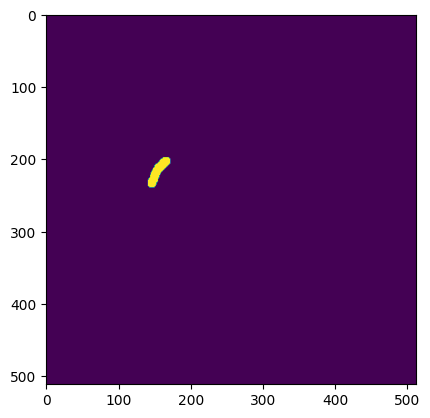

In [27]:
count=0
for i in range(mask_3d.shape[-1]):
    if np.sum(mask_3d[:,:,i])>0 and count<31: 
        plt.imshow(mask_3d[:,:,i])
        plt.show()
        break

In [29]:
path+ctfile

'//zkh/appdata/RTDicom/Projectline - Modelling lung cancer outcomes [panama code]/DICOM_data/DATA_VOLLEDIG_unstructured/0004879\x04883/T=50%,PR=45% - 54%,AR()=70 - 93/'